In [9]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
boston = load_boston()
X, y = boston['data'], boston['target']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [68]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Linear Regression

In [13]:
## Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)
ypred_train = lin_reg.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = lin_reg.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

3.4414299195261484 3.1848965395171556
0.7335025069949149
0.7505671340894271


In [14]:
lin_reg.coef_

array([-0.88598124,  0.93013774,  0.33350102,  0.51122921, -2.09275209,
        2.79766457,  0.16964695, -3.36904545,  2.71560712, -2.27284733,
       -1.98890831,  0.74158655, -4.21345007])

In [20]:
## Linear Regression with regularization
from sklearn.linear_model import Ridge, Lasso
lin_reg = Ridge(alpha = 10)
lin_reg.fit(xtrain, ytrain)
ypred_train = lin_reg.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = lin_reg.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))
print(lin_reg.coef_)

3.407783164235754 3.097984465295987
0.7320602857791296
0.7557368296423601
[-0.80690837  0.74507485  0.02587419  0.55810899 -1.77125068  2.87937862
  0.09484673 -3.03899988  2.01917211 -1.58291573 -1.90407935  0.7491203
 -4.03193741]


In [22]:
## Linear Regression with regularization
from sklearn.linear_model import Ridge, Lasso
lin_reg = Lasso(alpha = 0.10)
lin_reg.fit(xtrain, ytrain)
ypred_train = lin_reg.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = lin_reg.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))
print(lin_reg.coef_)

3.426810301319748 3.1187071241577002
0.7285014192241286
0.7469048720668257
[-0.6132964   0.50085088 -0.          0.4928036  -1.52663216  2.93436208
  0.         -2.76930137  1.30371506 -0.99159626 -1.84562494  0.66359102
 -4.16690505]


In [32]:
## Gradient Descent
weights = np.random.randn(1, 13)
bias = np.zeros(1)

for i in range(100):
    yhat = weights@xtrain.T + bias
    error = mean_absolute_error(yhat.reshape(-1, 1), ytrain)
    if i%10 ==0:
        print(error)

    grad_w = (yhat - ytrain)@xtrain
    grad_b = np.sum((yhat - ytrain))

    weights -= 0.05*grad_w/len(xtrain)
    bias -= 0.05*grad_b/len(xtrain)

22.72717678100264
13.607600263387095
8.163764883396583
5.166887661312078
3.8802547534124976
3.454544312193774
3.350035567286122
3.341205470552984
3.3614032498303197
3.3828865263256414


In [37]:
ypred_train = (weights@xtrain.T + bias).reshape(-1,1)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = (weights@xtest.T + bias).reshape(-1,1)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))
print(lin_reg.coef_)

3.398728467345587 3.0387106928662306
0.7280695768810244
0.7554052608625801
[-0.6132964   0.50085088 -0.          0.4928036  -1.52663216  2.93436208
  0.         -2.76930137  1.30371506 -0.99159626 -1.84562494  0.66359102
 -4.16690505]


## Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 2)
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = model.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

3.52086087359133 3.775281214848145
0.7030969818985984
0.6582144295443204


In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, max_depth = 2)
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = model.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

3.1184031999408806 3.332113673698424
0.7726907951211208
0.7352788987580346


In [45]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = model.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

2.2878247129658167 3.0129091804961976
0.9159690628206532
0.7878055411953732


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = model.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

0.9930595928956896 2.285180748163254
0.9827531855055194
0.8737651344609334


In [52]:
# from sklearn.ensemble import XGBoostRegressor
# from xgboost import XGBoostRegressor
# model = GradientBoostingRegressor()
# model.fit(xtrain, ytrain)
# ypred_train = model.predict(xtrain)
# train_mae = mean_absolute_error(ypred_train, ytrain)

# ypred_test = model.predict(xtest)
# test_mae = mean_absolute_error(ypred_test, ytest)
# print(train_mae, test_mae)
# print(r2_score(ytrain, ypred_train))
# print(r2_score(ytest, ypred_test))

In [77]:
## Neural Network
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 13, kernel_initializer = 'he_normal', activation = 'relu'),
    tf.keras.layers.Dense(1, kernel_initializer = 'he_normal')
])

In [78]:
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mse'])
model.fit(xtrain, ytrain, epochs = 30, verbose = -1)

Train on 379 samples
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [79]:
ypred_train = model.predict(xtrain)
train_mae = mean_absolute_error(ypred_train, ytrain)

ypred_test = model.predict(xtest)
test_mae = mean_absolute_error(ypred_test, ytest)
print(train_mae, test_mae)
print(r2_score(ytrain, ypred_train))
print(r2_score(ytest, ypred_test))

16.884160232197956 17.17202984620267
-3.350850483322117
-2.8883105982644173


In [80]:
xtrain_noisy = xtrain + + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=xtrain.shape)

In [81]:
autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (13,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(13)
])
autoencoder.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mse'])
autoencoder.fit(xtrain, xtrain_noisy, epochs = 30, verbose = -1)

Train on 379 samples
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


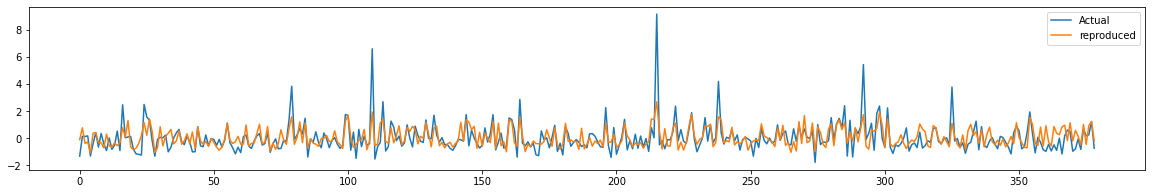

In [83]:
train_pred = autoencoder.predict(xtrain_noisy)
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 3))
plt.plot(xtrain_noisy[-500:,0],label="Actual")
plt.plot(train_pred[-500:,0],label="reproduced")
plt.legend()
plt.show();